In [1]:
import pandas as pd
import sqlite3

In [3]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("db.sqlite3")
df = pd.read_sql_query("SELECT * from employee_feedback_data", con)

# Verify that result of SQL query is stored in the dataframe
print(df)

con.close()

    id Employee_ID             Domain     Working_years Bored  \
0    1     LMC0310             Python         1-2 years    No   
1    2     LMC0101             Hadoop         3-5 years   Yes   
2    3     LMC0238             Python         1-2 years    No   
3    4     LMC0157  Quality Assurance         3-5 years   Yes   
4    5     LMC0212            Angular  Less than a year    No   
5    6     LMC0226             Oracle         3-5 years    No   
6    7     LMC0271            Angular         3-5 years    No   
7    8     LMC0052               Java         3-5 years   Yes   
8    9     LMC0421  Quality Assurance  Less than a year    No   
9   10     LMC0326   Business Analyst         1-2 years   Yes   
10  11     LMC0203            PowerBI         1-2 years    No   
11  12     LMC0094            Tableau         3-5 years    No   
12  13     LMC0122      Microstrategy         3-5 years    No   
13  14     LMC0268     Human Resource         1-2 years    No   
14  15     LMC0403   Busi

In [4]:
df.to_csv('Employee_data.csv')

In [3]:
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv('Employee_data.csv')

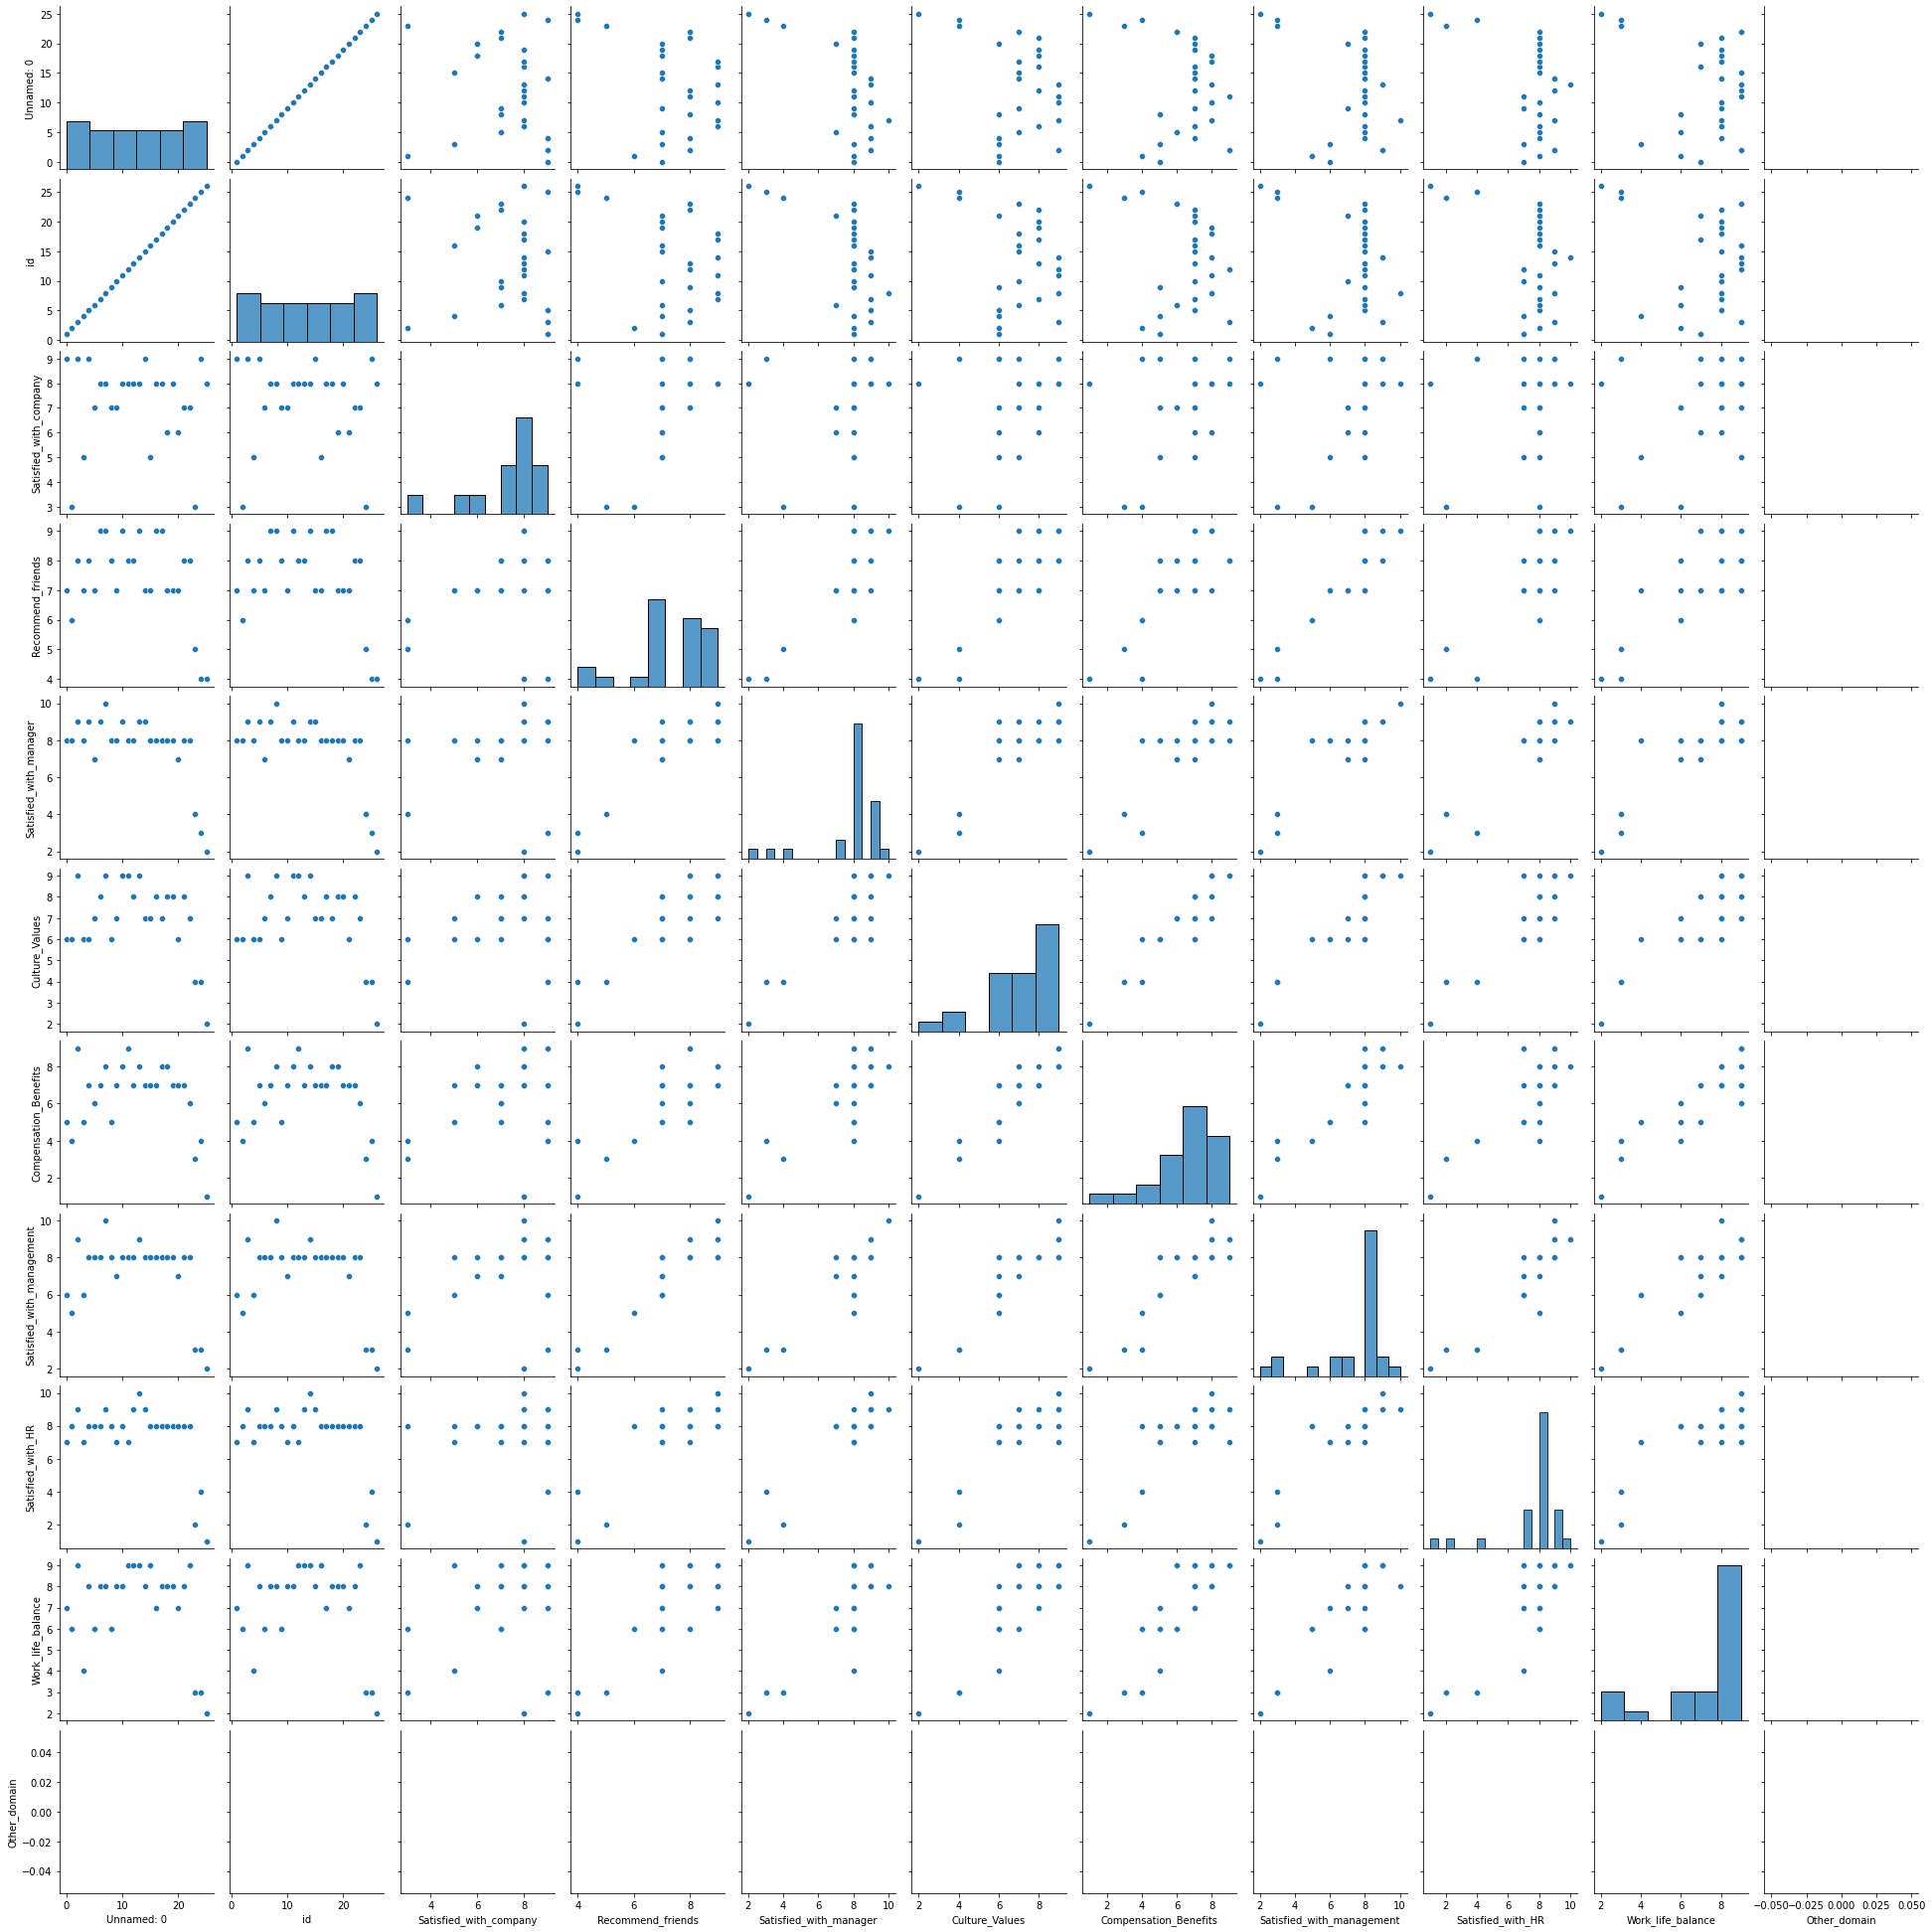

In [6]:
sns.pairplot(df)

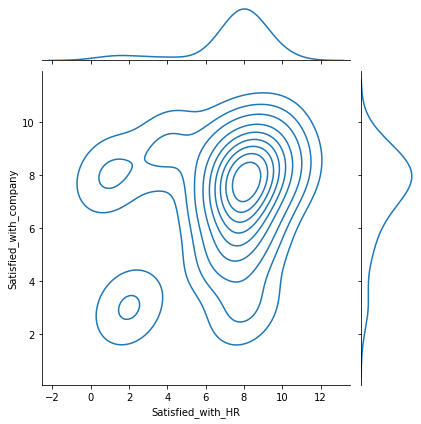

In [9]:
sns.jointplot(x='Satisfied_with_HR',y='Satisfied_with_company',data=df, kind='kde')

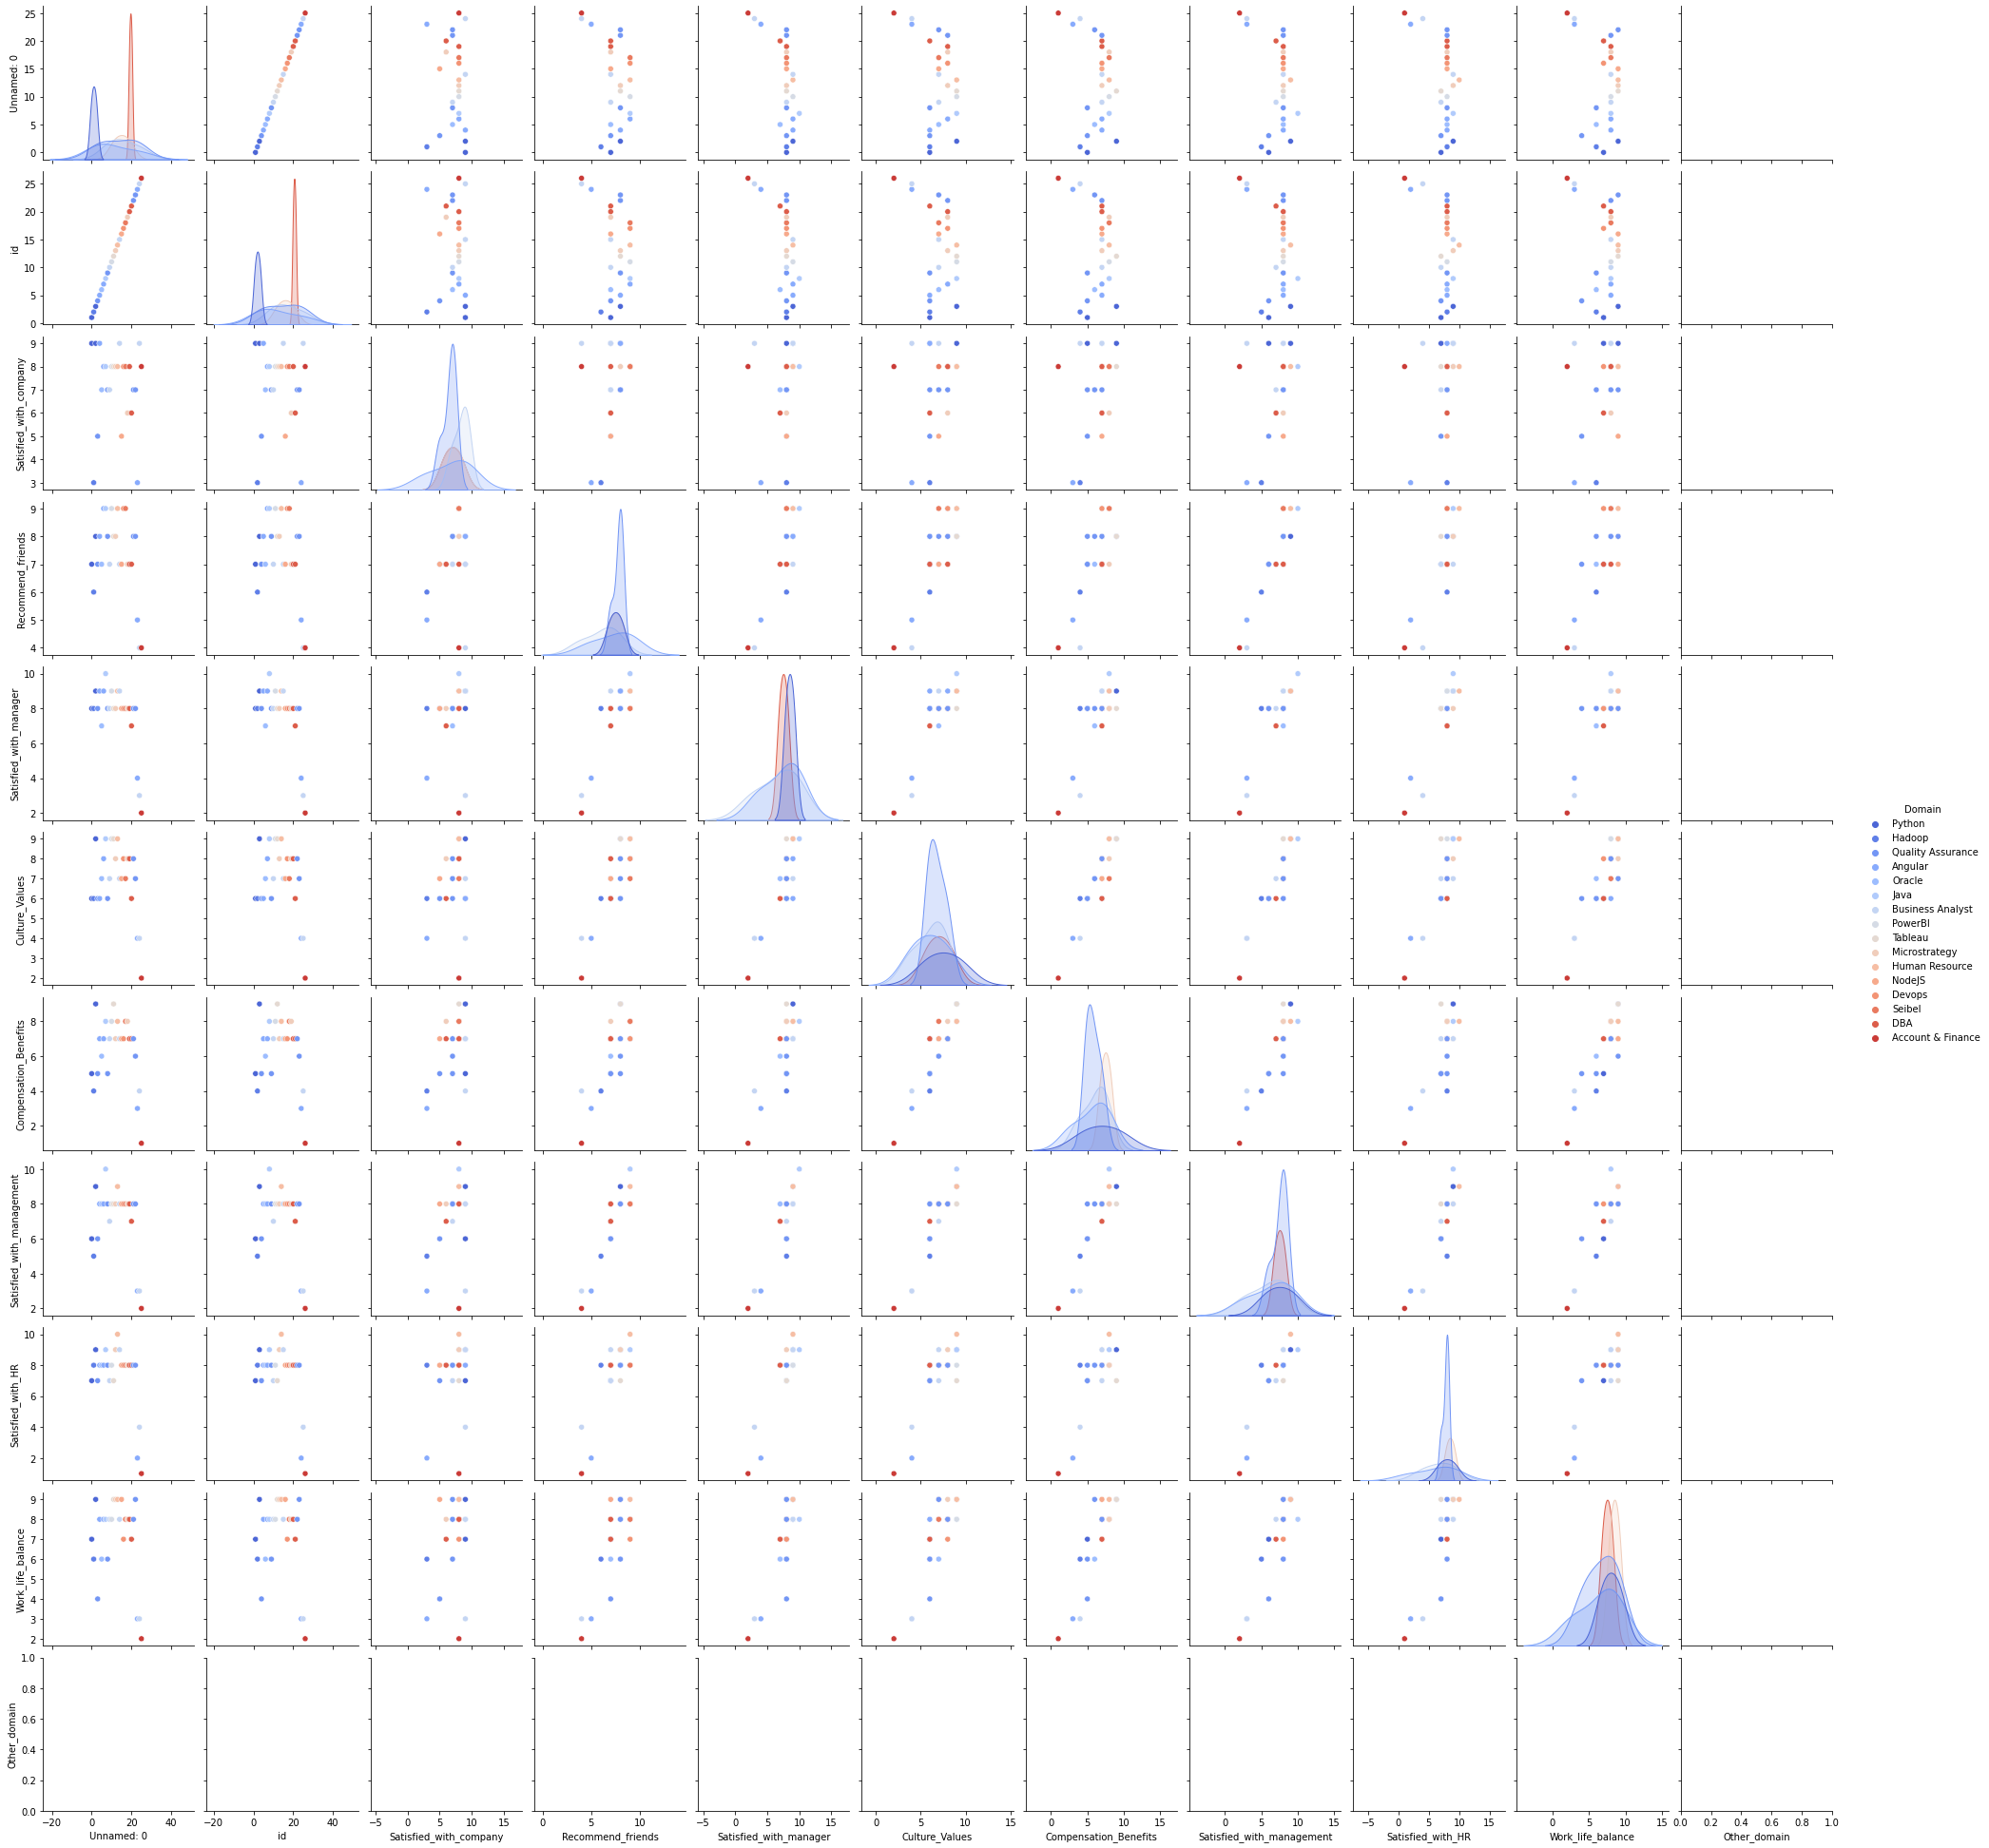

In [11]:
sns.pairplot(df,hue='Domain',palette='coolwarm')

Domain with Satisfied with company

<AxesSubplot: xlabel='Domain', ylabel='Satisfied_with_company'>

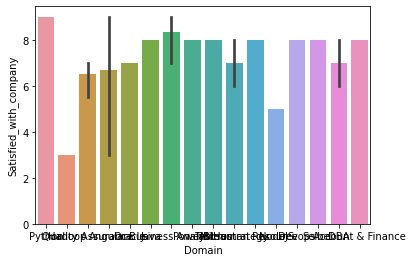

In [12]:
sns.barplot(x='Domain',y='Satisfied_with_company',data=df)

Total feedback based on domain

<AxesSubplot: xlabel='Domain', ylabel='count'>

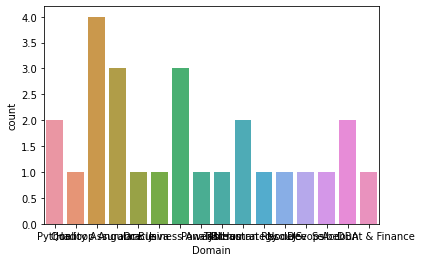

In [13]:
sns.countplot(x='Domain',data=df)

<AxesSubplot: xlabel='Domain', ylabel='Satisfied_with_company'>

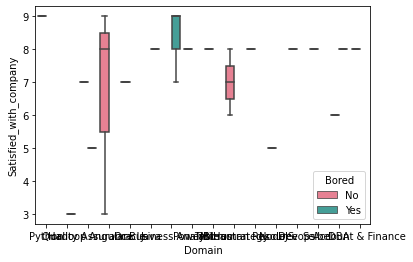

In [16]:
sns.boxplot(x='Domain',y='Satisfied_with_company',data=df,hue='Bored',palette='husl')

<AxesSubplot: xlabel='Domain', ylabel='Satisfied_with_company'>

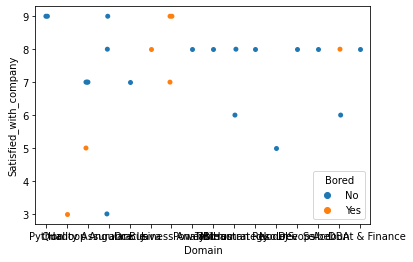

In [18]:
sns.stripplot(x='Domain',y='Satisfied_with_company',data=df,jitter=True,hue='Bored')

In [6]:
from typing import Generator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
data = pd.read_csv('Employee_data.csv')

In [8]:
data.head()

,Unnamed: 0,id,Employee_ID,Domain,Working_years,Bored,Satisfied_with_company,Recommend_friends,Working_team,Team_improve,...,Satisfied_with_management,Management_improve,Improve_work,Satisfied_with_HR,Hr_improve,Work_life_balance,Suggestions,Improve_company,Other_domain,Free_time
0,0,1,LMC0310,Python,1-2 years,No,9,7,Yes,NaN,...,6,NaN,Remote clockin for 1 year exprience employees,7,NaN,7,NaN,NaN,NaN,NaN
1,1,2,LMC0101,Hadoop,3-5 years,Yes,3,6,Yes,NaN,...,5,NaN,Remote clock in,8,NaN,6,NaN,Organization need to follow CMMI,NaN,Workout in Gym
2,2,3,LMC0238,Python,1-2 years,No,9,8,Yes,NaN,...,9,NaN,Nothing.,9,NaN,9,It&#039;s Going Good.,NaN,NaN,NaN
3,3,4,LMC0157,Quality Assurance,3-5 years,Yes,5,7,Yes,NaN,...,6,Need to give bonus,Remote clock in\r\nHybrid mode,7,Need to improve,4,no comments,Need to improve work life balance,NaN,Workout in Gym
4,4,5,LMC0212,Angular,Less than a year,No,9,8,Yes,NaN,...,8,NaN,NaN,8,NaN,8,NaN,NaN,NaN,NaN


In [9]:
print(data.isnull().sum())

Unnamed: 0                    0
id                            0
Employee_ID                   0
Domain                        0
Working_years                 0
Bored                         0
Satisfied_with_company        0
Recommend_friends             0
Working_team                  0
Team_improve                 23
Coming_to_work                0
Satisfied_with_manager        0
Manager_improve              21
Culture_Values                0
Compensation_Benefits         0
Satisfied_with_management     0
Management_improve           20
Improve_work                  1
Satisfied_with_HR             0
Hr_improve                   20
Work_life_balance             0
Suggestions                   9
Improve_company              22
Other_domain                 26
Free_time                    19
dtype: int64


In [10]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KarthikKonduru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
from nltk.stem import SnowballStemmer

In [12]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[&#;]','',text)
    text = re.sub('NaN', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    return text
data["Suggestions"] = data["Suggestions"].apply(clean)

In [15]:
ratings = data["Satisfied_with_company"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
                values = quantity,
                names = numbers, hole = 0.5,title='Satisfied_with_company')

Satisfied with company in percentage

In [16]:
figure.show()

In [2]:
import pandas as pd
import sqlite3

In [3]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("db.sqlite3")
df = pd.read_sql_query("SELECT * from employee_feedback_data", con)

con.close()

In [4]:
df.drop(['id','Employee_ID','Other_domain','Working_years','Free_time','Improve_company','Working_team','Team_improve','Coming_to_work','Manager_improve','Management_improve',
         'Improve_work','Hr_improve','Suggestions'],axis=1,inplace=True)

In [5]:
df.columns

Index(['Domain', 'Bored', 'Satisfied_with_company', 'Recommend_friends',
       'Satisfied_with_manager', 'Culture_Values', 'Compensation_Benefits',
       'Satisfied_with_management', 'Satisfied_with_HR', 'Work_life_balance'],
      dtype='object')

In [6]:
df['Satisfied_with_company'] = df['Satisfied_with_company'].astype(str).astype(int)
df['Recommend_friends'] = df['Recommend_friends'].astype(str).astype(int)
df['Satisfied_with_manager'] = df['Satisfied_with_manager'].astype(str).astype(int)
df['Culture_Values'] = df['Culture_Values'].astype(str).astype(int)
df['Compensation_Benefits'] = df['Compensation_Benefits'].astype(str).astype(int)
df['Satisfied_with_management'] = df['Satisfied_with_management'].astype(str).astype(int)
df['Satisfied_with_HR'] = df['Satisfied_with_HR'].astype(str).astype(int)
df['Work_life_balance'] = df['Work_life_balance'].astype(str).astype(int)

In [7]:
def convert_to_category(value):
    if value >= 1 and value <= 3:
        return "unsatisfied"
    elif value >= 4 and value <= 7:
        return "neutral"
    elif value >= 8 and value <= 10:
        return "satisfied"
    else:
        return "unknown"

# Apply the function to the "Satisfied_with_company" column


In [8]:
df["Satisfied_with_company"] = df["Satisfied_with_company"].apply(lambda x: convert_to_category(x))
df["Recommend_friends"] = df["Recommend_friends"].apply(lambda x: convert_to_category(x))
df["Satisfied_with_manager"] = df["Satisfied_with_manager"].apply(lambda x: convert_to_category(x))
df["Culture_Values"] = df["Culture_Values"].apply(lambda x: convert_to_category(x))
df["Compensation_Benefits"] = df["Compensation_Benefits"].apply(lambda x: convert_to_category(x))
df["Satisfied_with_management"] = df["Satisfied_with_management"].apply(lambda x: convert_to_category(x))
df["Satisfied_with_HR"] = df["Satisfied_with_HR"].apply(lambda x: convert_to_category(x))
df["Work_life_balance"] = df["Work_life_balance"].apply(lambda x: convert_to_category(x))

In [9]:
df

,Domain,Bored,Satisfied_with_company,Recommend_friends,Satisfied_with_manager,Culture_Values,Compensation_Benefits,Satisfied_with_management,Satisfied_with_HR,Work_life_balance
0,Oracle,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
1,Oracle,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
2,.Net,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,neutral
3,Business Analyst,Yes,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
4,Oracle,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
5,Tableau,No,satisfied,neutral,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral
6,.Net,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
7,Angular,No,satisfied,satisfied,neutral,satisfied,satisfied,satisfied,satisfied,satisfied
8,Oracle,Yes,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
9,Angular,Yes,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Domain                     44 non-null     object
 1   Bored                      44 non-null     object
 2   Satisfied_with_company     44 non-null     object
 3   Recommend_friends          44 non-null     object
 4   Satisfied_with_manager     44 non-null     object
 5   Culture_Values             44 non-null     object
 6   Compensation_Benefits      44 non-null     object
 7   Satisfied_with_management  44 non-null     object
 8   Satisfied_with_HR          44 non-null     object
 9   Work_life_balance          44 non-null     object
dtypes: object(10)
memory usage: 3.6+ KB


In [11]:
df.to_csv("updated.csv",index=False)

In [12]:
df

,Domain,Bored,Satisfied_with_company,Recommend_friends,Satisfied_with_manager,Culture_Values,Compensation_Benefits,Satisfied_with_management,Satisfied_with_HR,Work_life_balance
0,Oracle,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
1,Oracle,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
2,.Net,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,neutral
3,Business Analyst,Yes,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
4,Oracle,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
5,Tableau,No,satisfied,neutral,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral
6,.Net,No,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
7,Angular,No,satisfied,satisfied,neutral,satisfied,satisfied,satisfied,satisfied,satisfied
8,Oracle,Yes,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
9,Angular,Yes,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral


In [13]:
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split

x = df.drop(['Domain'],axis=1)
y = df['Domain']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
train_data = X_train.join(y_train)

In [17]:
train_data

,Bored,Satisfied_with_company,Recommend_friends,Satisfied_with_manager,Culture_Values,Compensation_Benefits,Satisfied_with_management,Satisfied_with_HR,Work_life_balance,Domain
37,No,satisfied,neutral,neutral,satisfied,satisfied,satisfied,satisfied,satisfied,IT-SysAdmin
25,No,neutral,neutral,neutral,neutral,neutral,neutral,unsatisfied,neutral,Business Analyst
9,Yes,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,Angular
33,No,satisfied,unsatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,UI/UX
32,No,satisfied,neutral,satisfied,neutral,satisfied,satisfied,satisfied,satisfied,Hadoop
34,No,satisfied,satisfied,neutral,satisfied,satisfied,unsatisfied,neutral,satisfied,Oracle
5,No,satisfied,neutral,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,Tableau
26,No,neutral,satisfied,neutral,neutral,neutral,satisfied,neutral,neutral,Business Analyst
18,Yes,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,neutral,neutral,PowerBI
31,Yes,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,Hadoop


In [18]:

df = train_data

sentiment_scores = []
for i, row in df.iterrows():
    score = 0
    if row['Satisfied_with_company'] == 'satisfied':
        score += 1
    elif row['Satisfied_with_company'] == 'unsatisfied':
        score -= 1

    if row['Recommend_friends'] == 'satisfied':
        score += 1
    elif row['Recommend_friends'] == 'unsatisfied':
        score -= 1

    if row['Satisfied_with_manager'] == 'satisfied':
        score += 1
    elif row['Satisfied_with_manager'] == 'unsatisfied':
        score -= 1

    if row['Culture_Values'] == 'satisfied':
        score += 1
    elif row['Culture_Values'] == 'unsatisfied':
        score -= 1

    if row['Compensation_Benefits'] == 'satisfied':
        score += 1
    elif row['Compensation_Benefits'] == 'unsatisfied':
        score -= 1

    if row['Satisfied_with_management'] == 'satisfied':
        score += 1
    elif row['Satisfied_with_management'] == 'unsatisfied':
        score -= 1

    if row['Satisfied_with_HR'] == 'satisfied':
        score += 1
    elif row['Satisfied_with_HR'] == 'unsatisfied':
        score -= 1

    if row['Work_life_balance'] == 'satisfied':
        score += 1
    elif row['Work_life_balance'] == 'unsatisfied':
        score -= 1

    sentiment_scores.append(score)

df['Sentiment'] = sentiment_scores

print('Overall sentiment score:', sum(sentiment_scores))


Overall sentiment score: 103


In [19]:
train_data

,Bored,Satisfied_with_company,Recommend_friends,Satisfied_with_manager,Culture_Values,Compensation_Benefits,Satisfied_with_management,Satisfied_with_HR,Work_life_balance,Domain,Sentiment
37,No,satisfied,neutral,neutral,satisfied,satisfied,satisfied,satisfied,satisfied,IT-SysAdmin,6
25,No,neutral,neutral,neutral,neutral,neutral,neutral,unsatisfied,neutral,Business Analyst,-1
9,Yes,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,Angular,4
33,No,satisfied,unsatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,UI/UX,6
32,No,satisfied,neutral,satisfied,neutral,satisfied,satisfied,satisfied,satisfied,Hadoop,6
34,No,satisfied,satisfied,neutral,satisfied,satisfied,unsatisfied,neutral,satisfied,Oracle,4
5,No,satisfied,neutral,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,Tableau,-2
26,No,neutral,satisfied,neutral,neutral,neutral,satisfied,neutral,neutral,Business Analyst,2
18,Yes,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,neutral,neutral,PowerBI,-3
31,Yes,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,Hadoop,4


In [21]:
df = train_data

# Replace 'No' values in the 'Bored' column with 0
df['Bored'] = df['Bored'].apply(lambda x: 0 if x == 'No' else 1)

In [22]:
df

,Bored,Satisfied_with_company,Recommend_friends,Satisfied_with_manager,Culture_Values,Compensation_Benefits,Satisfied_with_management,Satisfied_with_HR,Work_life_balance,Domain,Sentiment
37,1,satisfied,neutral,neutral,satisfied,satisfied,satisfied,satisfied,satisfied,IT-SysAdmin,6
25,1,neutral,neutral,neutral,neutral,neutral,neutral,unsatisfied,neutral,Business Analyst,-1
9,1,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,Angular,4
33,1,satisfied,unsatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,UI/UX,6
32,1,satisfied,neutral,satisfied,neutral,satisfied,satisfied,satisfied,satisfied,Hadoop,6
34,1,satisfied,satisfied,neutral,satisfied,satisfied,unsatisfied,neutral,satisfied,Oracle,4
5,1,satisfied,neutral,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,Tableau,-2
26,1,neutral,satisfied,neutral,neutral,neutral,satisfied,neutral,neutral,Business Analyst,2
18,1,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,neutral,neutral,PowerBI,-3
31,1,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,Hadoop,4


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the data from a CSV file
df = train_data



# Convert the 'Domain' column to a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Domain'])

# Train a Naive Bayes classifier on the data
y = df['Satisfied_with_company']
clf = MultinomialNB()
clf.fit(X, y)

new_text = ['Python is great']
X_new = vectorizer.transform(new_text)
y_new = clf.predict(X_new)

print(y_new)


['satisfied']


In [24]:
df

,Bored,Satisfied_with_company,Recommend_friends,Satisfied_with_manager,Culture_Values,Compensation_Benefits,Satisfied_with_management,Satisfied_with_HR,Work_life_balance,Domain,Sentiment
37,1,satisfied,neutral,neutral,satisfied,satisfied,satisfied,satisfied,satisfied,IT-SysAdmin,6
25,1,neutral,neutral,neutral,neutral,neutral,neutral,unsatisfied,neutral,Business Analyst,-1
9,1,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,Angular,4
33,1,satisfied,unsatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,UI/UX,6
32,1,satisfied,neutral,satisfied,neutral,satisfied,satisfied,satisfied,satisfied,Hadoop,6
34,1,satisfied,satisfied,neutral,satisfied,satisfied,unsatisfied,neutral,satisfied,Oracle,4
5,1,satisfied,neutral,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,Tableau,-2
26,1,neutral,satisfied,neutral,neutral,neutral,satisfied,neutral,neutral,Business Analyst,2
18,1,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,neutral,neutral,PowerBI,-3
31,1,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,Hadoop,4


<AxesSubplot: xlabel='Domain', ylabel='count'>

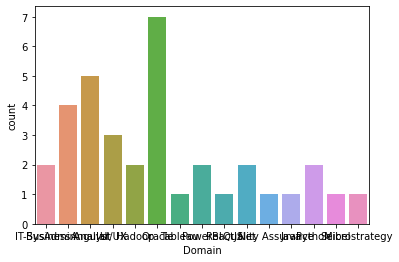

In [25]:
import seaborn as sns

sns.countplot(x='Domain', data=df)


Text(0, 0.5, 'Work-life balance')

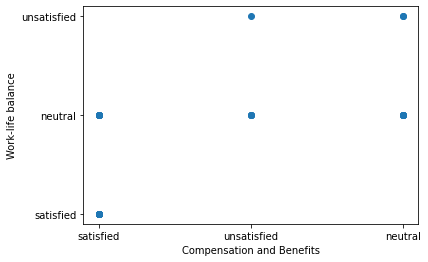

In [53]:
import matplotlib.pyplot as plt

plt.scatter(x=train_data['Compensation_Benefits'], y=train_data['Work_life_balance'])
plt.xlabel('Compensation and Benefits')
plt.ylabel('Work-life balance')


In [26]:
train_data

,Bored,Satisfied_with_company,Recommend_friends,Satisfied_with_manager,Culture_Values,Compensation_Benefits,Satisfied_with_management,Satisfied_with_HR,Work_life_balance,Domain,Sentiment
37,1,satisfied,neutral,neutral,satisfied,satisfied,satisfied,satisfied,satisfied,IT-SysAdmin,6
25,1,neutral,neutral,neutral,neutral,neutral,neutral,unsatisfied,neutral,Business Analyst,-1
9,1,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,Angular,4
33,1,satisfied,unsatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,UI/UX,6
32,1,satisfied,neutral,satisfied,neutral,satisfied,satisfied,satisfied,satisfied,Hadoop,6
34,1,satisfied,satisfied,neutral,satisfied,satisfied,unsatisfied,neutral,satisfied,Oracle,4
5,1,satisfied,neutral,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,Tableau,-2
26,1,neutral,satisfied,neutral,neutral,neutral,satisfied,neutral,neutral,Business Analyst,2
18,1,unsatisfied,neutral,neutral,unsatisfied,unsatisfied,neutral,neutral,neutral,PowerBI,-3
31,1,neutral,satisfied,neutral,satisfied,neutral,satisfied,neutral,satisfied,Hadoop,4


In [27]:
a = train_data['Domain']

In [28]:
b = train_data['Sentiment']

In [29]:
new = pd.concat([a, b], axis=1)

In [30]:
new

,Domain,Sentiment
37,IT-SysAdmin,6
25,Business Analyst,-1
9,Angular,4
33,UI/UX,6
32,Hadoop,6
34,Oracle,4
5,Tableau,-2
26,Business Analyst,2
18,PowerBI,-3
31,Hadoop,4


In [31]:
sentiment_scores = new.groupby('Domain')['Sentiment'].mean()

sentiment_scores

Domain
.Net                 5.000000
Angular              2.600000
Business Analyst     0.750000
Hadoop               5.000000
IT-SysAdmin          2.000000
Java                -5.000000
Microstrategy        2.000000
Oracle               6.857143
PowerBI             -4.500000
Python               5.000000
Quality Assurance   -1.000000
ReactJS              2.000000
Seibel               6.000000
Tableau             -2.000000
UI/UX                4.000000
Name: Sentiment, dtype: float64

In [32]:
sentiment_scores.info()

<class 'pandas.core.series.Series'>
Index: 15 entries, .Net to UI/UX
Series name: Sentiment
Non-Null Count  Dtype  
--------------  -----  
15 non-null     float64
dtypes: float64(1)
memory usage: 796.0+ bytes


In [33]:
df12 = sentiment_scores.reset_index()
df12.columns = ['Domain', 'Sentiment']

In [34]:
df12

,Domain,Sentiment
0,.Net,5.000000
1,Angular,2.600000
2,Business Analyst,0.750000
3,Hadoop,5.000000
4,IT-SysAdmin,2.000000
5,Java,-5.000000
6,Microstrategy,2.000000
7,Oracle,6.857143
8,PowerBI,-4.500000
9,Python,5.000000


In [48]:
sentiment = df12.loc[df12['Domain'] == 'Python', 'Sentiment'].values[0]
print(sentiment)

5.0


In [46]:
df12._get_value('Python', 'Sentiment')

KeyError: 'Python'

In [43]:
a = df12['Sentiment'].loc[df12['Domain']=="Python"]

In [60]:
profile = df.profile_report(title='Pandas Profiling Report')


In [61]:
profile.to_file("test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
train_data.drop(['index'],axis=1,inplace=True)

In [71]:
from dataprep.eda import create_report

In [72]:
report = create_report(train_data, title="Employee data")

  0%|          | 0/1143 [00:00<?, ?it/s]

c:\Users\KarthikKonduru\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\KarthikKonduru\AppData\Local\Programs\Python\Python310\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


In [73]:
report.show_browser()